# Identify the commercial centers within the Jaipur city

In [1]:
# Importing necessary python packages.

import json
import matplotlib.pyplot as plt
import numpy as np
import overpy    # Python module to extract POI data of Jaipur from Open Street Map (OSM).
import shapefile as shp    # Python module to write, read and modify the shapefiles. 
from sklearn.cluster import DBSCAN, KMeans    # Used for spatial clustering of the points.

In [2]:
# Opening the spatial data file containing POI data of Jaipur city.
with open('./spatial_data.txt', 'r') as f:
    data = json.load(f)

In [3]:
data

{'elements': [{'id': 566811986,
   'lat': 26.917309,
   'lon': 75.8035385,
   'tags': {'amenity': 'post_office', 'name': 'Central Post GPO'},
   'type': 'node'},
  {'id': 566815183,
   'lat': 26.92336,
   'lon': 75.82549,
   'tags': {'amenity': 'post_office', 'name': 'Post Bazar'},
   'type': 'node'},
  {'id': 566815520,
   'lat': 26.9162344,
   'lon': 75.8109013,
   'tags': {'amenity': 'restaurant', 'name': 'Natraj vegetarian Restaurant'},
   'type': 'node'},
  {'id': 566816025,
   'lat': 26.9169155,
   'lon': 75.8581133,
   'tags': {'amenity': 'place_of_worship',
    'name': 'Galta (Monkey Temple)',
    'name:en': 'Galta Ji (Monkey Temple)',
    'name:zh': '猴庙'},
   'type': 'node'},
  {'id': 566816109,
   'lat': 26.9171235,
   'lon': 75.8522929,
   'tags': {'amenity': 'place_of_worship', 'name': 'Sun Temple'},
   'type': 'node'},
  {'id': 691261875,
   'lat': 26.9106803,
   'lon': 75.7985655,
   'tags': {'amenity': 'restaurant', 'name': 'Anokhi Cafe'},
   'type': 'node'},
  {'id': 10

In [4]:
# Using overpy module to extract POI data of Jaipur city. POI data includes nodes of amenities like -- schools,
# restaurants, hospitals, commercial malls/shopping centers, etc. All the commercial centers in the city will have
# amenities very large in numbers as compared to other outskirts, isolated or poorly developed areas. 

api = overpy.Overpass()
res = api.query("""[out:json];
    area[name="Jaipur"][boundary=administrative]->.searchArea;
    (node["amenity"](area.searchArea);
     way["amenity"](area.searchArea);
     relation["amenity"](area.searchArea);
    );
    out center;
    """)

In [5]:
# Printing no. of ways, nodes (amenities), and relation between them in our POI data of Jaipur.

print(len(res.ways))
print(len(res.relations))
print(len(res.nodes))

72
0
422


In [26]:
# Printing the set of amenities used as POI nodes in Jaipur.

amenities = set()
for node in res.nodes:
    amenities.add(node.tags['amenity'])

print('Set of amenitites (POI nodes):', amenities)

Set of amenitites (POI nodes): {'clinic', 'fast_food', 'bicycle_rental', 'waste_disposal', 'hospital', 'police', 'restaurant', 'kindergarten', 'pharmacy', 'car_wash', 'post_box', 'college', 'university', 'blood_bank', 'doctors', 'drinking_water', 'bus_station', 'fuel', 'cafe', 'marketplace', 'bench', 'bar', 'ice_cream', 'fire_station', 'food_court', 'embassy', 'motorcycle_parking', 'place_of_worship', 'school', 'toilets', 'dentist', 'atm', 'parking', 'veterinary', 'library', 'cinema', 'car_rental', 'post_office', 'bank'}


In [7]:
# Collecting longitudes and latitudes of amenities within Jaipur for plotting.  

coords = []
coords += [(float(node.lon), float(node.lat)) for node in res.nodes]
coords += [(float(way.center_lon), float(way.center_lat))
           for way in res.ways]
coords += [(float(rel.center_lon), float(rel.center_lat))
           for rel in res.relations]

## Scatterplot showing the amenities (nodes) used as POI for Jaipur city

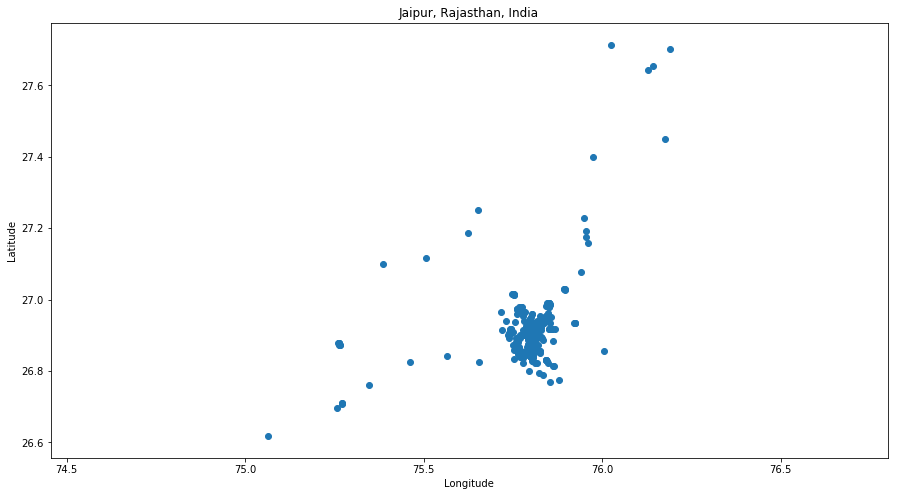

In [8]:
X = np.array(coords)

plt.figure(figsize=(15, 8))
plt.scatter(X[:,0], X[:,1])
plt.title('Jaipur, Rajasthan, India')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.axis('equal')
plt.show()

The **densely clustered points** (amenities) denote the **heart (posh commercial area)** of the city while other far-away points indicate the small number of amenities in **secluded** or **outskirts** or **underdeveloped areas** of the Jaipur city.

## Writing POI data to ESRI Shapefile

In [9]:
coords

[(75.8035385, 26.917309),
 (75.82549, 26.92336),
 (75.8109013, 26.9162344),
 (75.8581133, 26.9169155),
 (75.8522929, 26.9171235),
 (75.7985655, 26.9106803),
 (75.8005946, 26.9235814),
 (75.7978395, 26.9457198),
 (75.807437, 26.9163399),
 (75.8099046, 26.9152206),
 (75.8108916, 26.9162347),
 (75.8109024, 26.9162251),
 (75.8114782, 26.9162654),
 (75.8155544, 26.8942238),
 (75.8089288, 26.9154381),
 (75.8206447, 26.915706),
 (75.7955802, 26.9165302),
 (75.8514372, 26.9178291),
 (75.7923423, 26.9224909),
 (75.7406137, 26.8932773),
 (75.7947041, 26.9149),
 (75.8117789, 26.9304084),
 (75.6254991, 27.1872237),
 (75.7208819, 26.9149876),
 (75.8201955, 26.9168711),
 (75.8112486, 26.9164964),
 (75.8222237, 26.9158472),
 (75.7889678, 26.9108905),
 (75.8260441, 26.9195889),
 (75.7947798, 26.9223905),
 (75.7923721, 26.9026493),
 (75.7926001, 26.9026028),
 (75.7780051, 26.9549389),
 (75.7734203, 26.968861),
 (75.7805686, 26.9047068),
 (75.7821092, 26.9039855),
 (75.8061902, 26.8688181),
 (75.8111925

In [10]:
# Gathering longitudes and latitudes of nodes (amenities) and center coordinates of ways and relations.

points = []
points.append([[float(node.lon), float(node.lat)] for node in res.nodes])
points.append([[float(way.center_lon), float(way.center_lat)]
          for way in res.ways])
points.append([[float(rel.center_lon), float(rel.center_lat)]
           for rel in res.relations])

In [11]:
points

[[[75.8035385, 26.917309],
  [75.82549, 26.92336],
  [75.8109013, 26.9162344],
  [75.8581133, 26.9169155],
  [75.8522929, 26.9171235],
  [75.7985655, 26.9106803],
  [75.8005946, 26.9235814],
  [75.7978395, 26.9457198],
  [75.807437, 26.9163399],
  [75.8099046, 26.9152206],
  [75.8108916, 26.9162347],
  [75.8109024, 26.9162251],
  [75.8114782, 26.9162654],
  [75.8155544, 26.8942238],
  [75.8089288, 26.9154381],
  [75.8206447, 26.915706],
  [75.7955802, 26.9165302],
  [75.8514372, 26.9178291],
  [75.7923423, 26.9224909],
  [75.7406137, 26.8932773],
  [75.7947041, 26.9149],
  [75.8117789, 26.9304084],
  [75.6254991, 27.1872237],
  [75.7208819, 26.9149876],
  [75.8201955, 26.9168711],
  [75.8112486, 26.9164964],
  [75.8222237, 26.9158472],
  [75.7889678, 26.9108905],
  [75.8260441, 26.9195889],
  [75.7947798, 26.9223905],
  [75.7923721, 26.9026493],
  [75.7926001, 26.9026028],
  [75.7780051, 26.9549389],
  [75.7734203, 26.968861],
  [75.7805686, 26.9047068],
  [75.7821092, 26.9039855],
  [

In [12]:
# Create a polygon shapefile using 'shapefile' python module.

w = shp.Writer('shapefiles/polygon')
w.poly(points)
w.field('FIRST_FLD','C','40')
w.field('SECOND_FLD','C','40')
w.record('First','Polygon')
w.close()

## Reading the polygon Shapefile

shapefile Reader
    1 shapes (type 'POLYGON')
    1 records (3 fields)


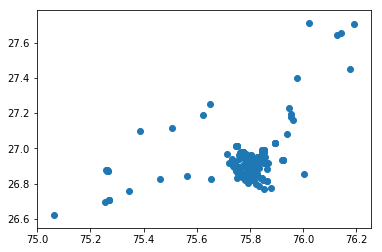

In [13]:
# Reading shapefile.

listx, listy = [], []
with shp.Reader('./shapefiles/polygon.shp') as f:
    print(f)
    for sr in f.shapeRecords():
        for xNew,yNew in sr.shape.points:
            listx.append(xNew)
            listy.append(yNew)
    plt.scatter(listx,listy)
    plt.show()

## Clustering

Clustering of POI points of Jaipur city to find out the commercial centers within the city.

In [14]:
# Using DBSCAN algorithm for clustering, a density-based spatial clustering algo. All the nodes (amenities) are
# clustered using their geographical coordinates and density to find out the commerical centers.
# As points are very near to each other, we need to use very small value of epsilon to get different smaller clusters. 

clustering = DBSCAN(eps=0.05, min_samples=2).fit(X)

In [15]:
clustering.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  2,  2,
        2,  2,  2,  2,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0, -1,
       -1,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,
        0,  0, -1, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0

## Scatterplot showing different clusters within a city using DBSCAN algo

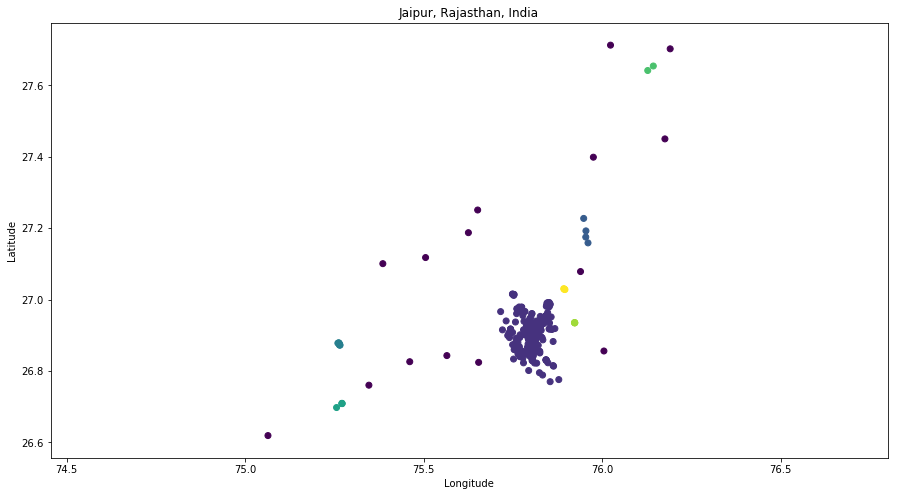

In [16]:
plt.figure(figsize=(15, 8))
plt.scatter(X[:,0], X[:,1], c=clustering.labels_.astype(float))
plt.title('Jaipur, Rajasthan, India')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.axis('equal')
plt.show()

From the scatterplot, we can observe that most of the points (amenities) are at the center surrounded by far-away points. So, the center area must be the posh main area of the city. Within this large cluster, there may be some small clusters as well. We'll zoom into the cluster to analyse it well in the further sections. 

## Using K-Means Clustering method

In [17]:
# K-means clustering to find out exactly 8 clusters in the data.
clustering = KMeans(n_clusters=8).fit(X)

In [18]:
clustering.labels_

array([3, 3, 3, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 7, 3, 3,
       6, 7, 3, 3, 3, 3, 3, 3, 3, 3, 7, 7, 3, 3, 5, 5, 5, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 3, 3, 3, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 3, 4, 3, 3, 3, 5, 5, 5, 5, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 7, 7, 7, 7, 7, 1, 1, 1, 1, 1, 1, 5, 3, 5, 1, 3, 3, 3, 3, 3,
       3, 3, 3, 4, 2, 7, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 7,
       7, 3, 3, 3, 3, 3, 3, 3, 3, 7, 7, 7, 5, 5, 5, 5, 5, 5, 3, 5, 5, 5,
       5, 5, 5, 5, 5, 0, 3, 6, 3, 7, 7, 7, 7, 6, 4, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 1, 3, 3, 0, 0, 3, 3, 3, 7, 7, 7, 7, 7, 7, 7, 7, 7, 5,
       3, 3, 5, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 5, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 0, 3, 0, 3, 3, 3, 7, 7, 5, 5, 3, 3, 3, 0, 0, 3, 3,
       3, 3, 3, 1, 1, 1, 0, 0, 5, 5, 5, 5, 5, 0, 3, 3, 3, 3, 3, 2, 3, 3,
       3, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 5,

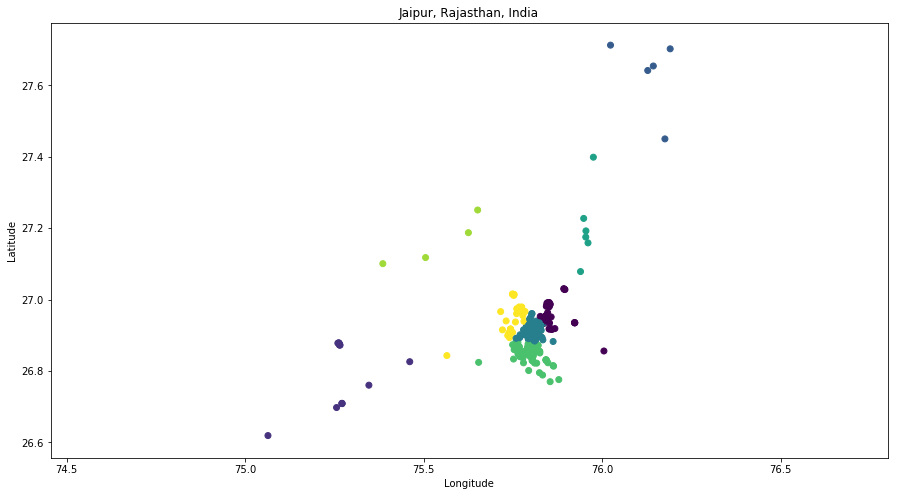

In [19]:
plt.figure(figsize=(15, 8))
plt.scatter(X[:,0], X[:,1], c=clustering.labels_.astype(float))
plt.title('Jaipur, Rajasthan, India')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.axis('equal')
plt.show()

Here, intententionally number of clusters is set high (=8) so that we can get smaller clusters within this center large cluster. So, as seen in in the figure, the center cluster has 4 smaller clusters denoted by colors: yellow, parrot green, purple, and dark green.

## Digging deeper: Analysing sub-clusters within a center cluster

In [27]:
# Filtering points (by lon and lat) such that points inside the large center cluster should only come.

filt_coords = []
filt_coords += [(float(node.lon), float(node.lat))
            for node in res.nodes if 75.7<=node.lon<=76.0 and 26.80<=node.lat<=27.0]
filt_coords += [(float(way.center_lon), float(way.center_lat))
           for way in res.ways if 75.7<=way.center_lon<=76.0 and 26.80<=way.center_lat<=27.0]
filt_coords += [(float(rel.center_lon), float(rel.center_lat))
           for rel in res.relations if 75.7<=rel.center_lon<=76.0 and 26.80<=rel.center_lat<=27.0]

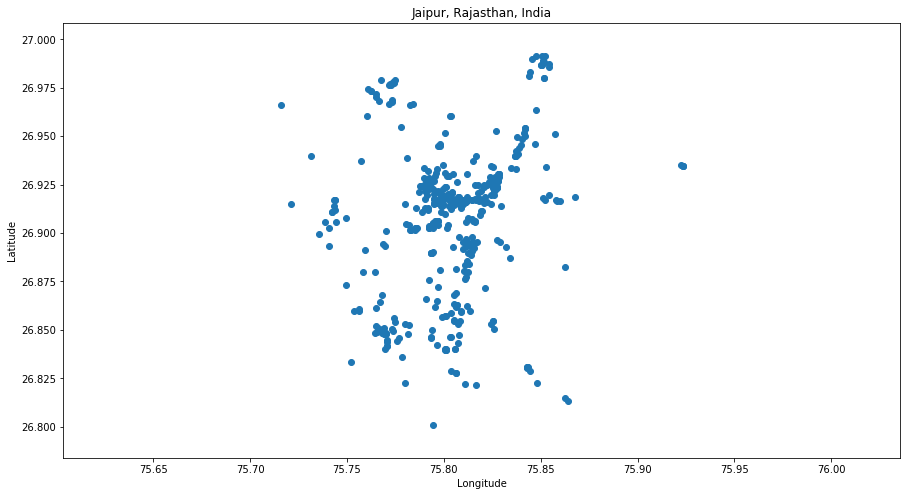

In [21]:
X = np.array(filt_coords)

plt.figure(figsize=(15, 8))
plt.scatter(X[:,0], X[:,1])
plt.title('Jaipur, Rajasthan, India')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.axis('equal')
plt.show()

This is a zoomed-in scatterplot of the large center cluster. We can clearly see some smaller clusters here. Let's cluster them using both DBSCAN and K-Means Clustering.

In [22]:
clustering = DBSCAN(eps=0.005, min_samples=2).fit(X)

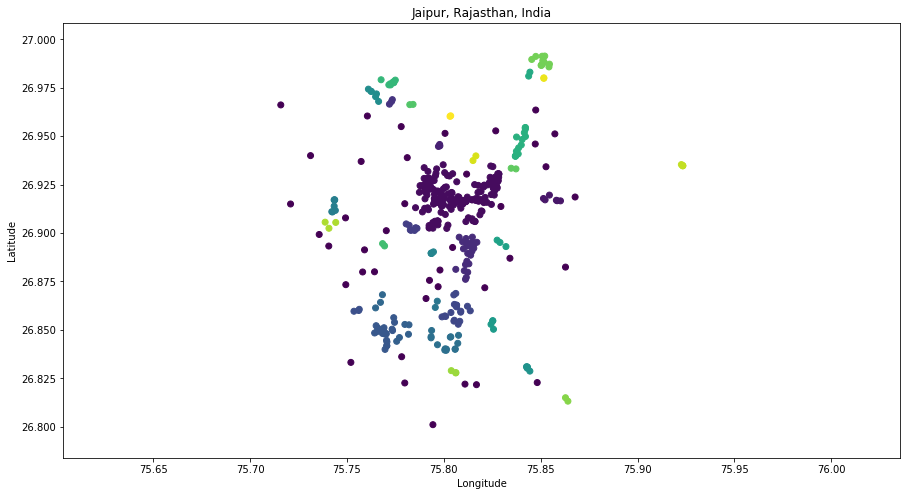

In [23]:
plt.figure(figsize=(15, 8))
plt.scatter(X[:,0], X[:,1], c=clustering.labels_.astype(float))
plt.title('Jaipur, Rajasthan, India')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.axis('equal')
plt.show()

From the above scatterplot, we can intuitively say that purple cluster has the highest density. It means it has the highest number of amenities in Jaipur. So, it is one of the commercial centers of Jaipur. Additionally, other smaller clusters are separate commercial areas in the city providing fewer amenities to the population residing there. 

In [24]:
clustering = KMeans(n_clusters=8).fit(X)

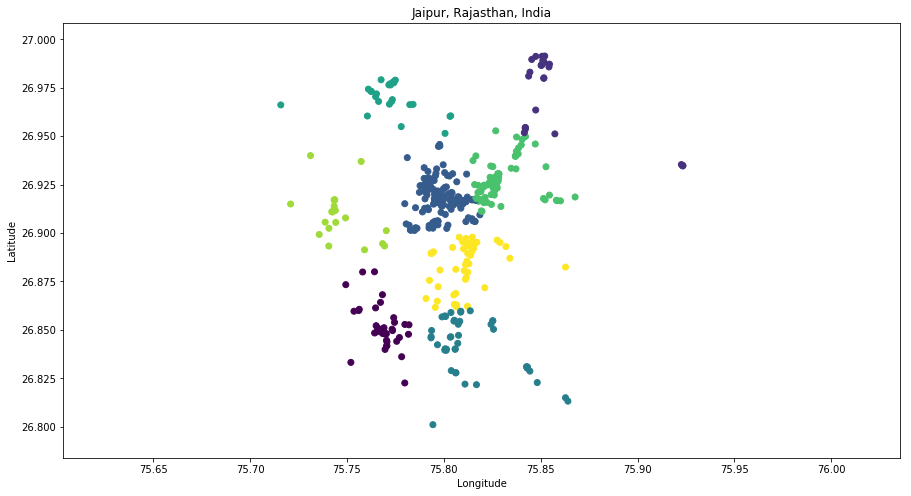

In [25]:
plt.figure(figsize=(15, 8))
plt.scatter(X[:,0], X[:,1], c=clustering.labels_.astype(float))
plt.title('Jaipur, Rajasthan, India')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.axis('equal')
plt.show()

The above plot demonstrates the K-means clustering on the POI points. Here we can clearly see that there are many sub-clusters denoting separate commercial centers. 